In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_decentralized import *
import os
from copy import deepcopy
from scipy.stats import beta
from collections import OrderedDict

### Evaluation of Decentralized Thompson Sampling for different network topologies

#### Experiment Names:

Experiment number 1: 3 arms with Bernoulli mean [0.1, 0.2, 0.5]

Experiment number 2: 17 arms with Bernoulli mean [0.5, 0.1, ...., 0.1]

##### Network Topologies considered:

cycle (3 regular graph with self loops)

5 regular graph with self loops

grid

complete

##### Color Scheme

#e41a1c
#377eb8
#4daf4a
#984ea3
#ff7f00
#ffff33
#a65628

In [12]:
# Parameters for run-time
max_iter = 800
runs = 1200

# Parameters for underlying MAB model
exp_num = 3
#theta = np.array([0.1, 0.2, 0.5]) # experiment 1
#theta = np.array([0.5] + [0.1] * 16) # experiment 2
theta = np.array([0.2646, 0.6135, 0.8950, 0.5764]) # experiment 3
num_arms = len(theta)

# Parameters for Thompson Sampling
alpha_vec = np.ones(num_arms)
beta_vec = np.ones(num_arms)

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [13]:
N = 36
rho = N
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N36'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N36'] = run_MultiAgent_TS(max_iter, runs, W, 
                                              alpha_vec, beta_vec, 
                                              theta, exp_num, 'cycle', 
                                              save = True, rerun=False)

Saved file was loaded


In [14]:
N = 64
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N64'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64'] = run_MultiAgent_TS(max_iter, runs, W, 
                                              alpha_vec, beta_vec, 
                                              theta, exp_num, 'cycle', 
                                              save = True, rerun=False)

Saved file was loaded


In [15]:
N = 81
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N81'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N81'] = run_MultiAgent_TS(max_iter, runs, W, 
                                              alpha_vec, beta_vec, 
                                              theta, exp_num, 'cycle', 
                                              save = True, rerun=False)

Saved file was loaded


In [16]:
N = 100
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N100'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N100'] = run_MultiAgent_TS(max_iter, runs, W, 
                                                        alpha_vec, beta_vec, 
                                                        theta, exp_num, 'cycle', 
                                                        save = True, rerun=False)

Saved file was loaded


In [ ]:
N = 144
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N144'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N144'] = run_MultiAgent_TS(max_iter, runs, W, 
                                               alpha_vec, beta_vec, 
                                               theta, exp_num, 'cycle', 
                                               save = True, rerun=False)

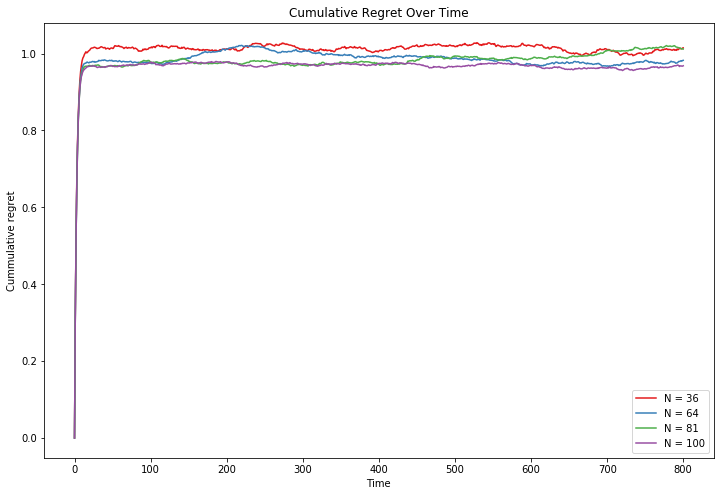

In [17]:
plt.figure(figsize=(12,8))

N36_plot, = plt.plot(avg_cumm_regret['ts_N36'], color='#e41a1c', label = r"N = 36")
N64_plot, = plt.plot(avg_cumm_regret['ts_N64'], color='#377eb8', label = r"N = 64")
N81_plot, = plt.plot(avg_cumm_regret['ts_N81'], color='#4daf4a', label = r"N = 81")
N100_plot, = plt.plot(avg_cumm_regret['ts_N100'], color='#984ea3', label = r"N = 100")
#N144_plot, = plt.plot(avg_cumm_regret['ts_N144_complete'], color='#ff7f00', label = r"N = 144$")

plt.xlabel("Time")
plt.ylabel(r"Cummulative regret")
plt.legend(handles=[N36_plot, N64_plot, N81_plot, N100_plot], loc='lower right')
#plt.legend(handles=[N36_plot, N64_plot, N81_plot, N100_plot, N144_plot], loc='lower right')
plt.title("Cumulative Regret Over Time")
plt.show()